In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
import os

caminho = r"Z:\Asset Management\FUNDOS e CLUBES\Gerencial"
arquivos = os.listdir(caminho)

print(arquivos)  # Lista todos os arquivos na pasta


['202302 - Base de Ativos.xlsx', '20230626 - Atualização.xlsx', 'Acompanhamento BE.xlsx', 'Acompanhamento Fundos.xlsx', 'AFHI.xlsx', 'AF_Trading v2.xlsm', 'AF_Trading.xlsm', 'AF_Trading_ajustes.xlsm', 'Ajustes', 'Ajustes - mai23.xlsx', 'Backup', 'BBG Andre.xlsx', 'Calculadora - YTC (att).xlsx', 'Calculadora - YTC (att.1).xlsx', 'Controle de Corretagem 2023.xlsx', 'Controle de Corretagem BOVESPA - 2023.xlsx', 'Controle de Corretagem BOVESPA - 2024.xlsx', 'Cálculo Hedge DI1 2 Recovered - ANTES.xlsx', 'Cálculo Hedge DI1 2 Recovered.xlsx', 'Cálculo Hedge DI1 2.xlsx', 'Cálculo Hedge DI1.xlsx', 'dashboard LFT.xlsx', 'Diretas.xlsx', 'duration tático.xlsx', 'Estudos', 'Fed funds.xlsx', 'FED.xlsx', 'FRA.xlsx', 'grid1_di1 bmf - colado valores.xlsx', 'grid1_di1 bmf.xlsx', 'ida-infra.xlsx', 'Investimentos AF 20.11.xlsx', 'Leilões Semanais.xlsx', 'OPERAÇÕES BONDS.xlsx', 'precos bbg.R', 'Thumbs.db', 'tsy curve.xlsx', 'Vencimento compromissada.xlsx', 'WIRP.xlsx']


In [39]:
df_div1 = pd.read_excel(r"Z:\Asset Management\FUNDOS e CLUBES\Gerencial\AF_Trading.xlsm", sheet_name="Base IPCA", skiprows=16)
df_div1 = df_div1.iloc[:, :13]
df_div1 = df_div1.dropna()
#Manter somente a coluna DAP e DV01
df_div1 = df_div1[['DAP', 'DV01']]
#Deixar as 3 primeiras e 2 ultimas strings da coluna DAP
df_div1['DAP'] = df_div1['DAP'].apply(lambda x: x[:3] + x[-2:] if isinstance(x, str) and len(x) >= 5 else x)
df_div1

,DAP,DV01
0,DAP25,3.34
1,DAP26,21.58
2,DAP27,31.05
3,DAP28,44.29
4,DAP29,50.88
5,DAP30,60.15
6,DAP32,70.77
7,DAP35,79.19
8,DAP40,82.47


In [40]:

def process_df():
    # Simulação de carga de dados - substituir com seus arquivos reais
    df_posicao = pd.read_excel('Relatório de Posição 2025-02-21.xlsx', sheet_name='Worksheet')
    df_debentures = pd.read_csv('tabela_debentures.csv')
    df_debentures['Juros projetados'] = (
        df_debentures['Juros projetados']
        .str.replace('.', '')
        .str.replace(',', '.')
        .astype(float)
    )
    df_debentures['Amortizações'] = (
        df_debentures['Amortizações']
        .str.replace('.', '')
        .str.replace(',', '.')
        .astype(float)
    )
    # Processamento dos dados
    ativos = ['VERO13', 'VAMO33', 'VAMO23', 'VALEC0', 'TBCR18', 'RISP12', 'JSMLB5', 
              'GASC23', 'PEJA11', 'PEJA21', 'NEOE26', 'MOVI37', 'MSGT33', 'MSGT13', 
              'IGSN15', 'SUMI17', 'EQTR11', 'ENEV32', 'ENGIA5', 'ESULA6', 'ENAT14',
              'ERDVC3', 'ECHP11', 'CPLD37', 'CHSF13', 'COCE18', 'CAEC12', 'CAEC21',
              'CEEBC3', 'EQPA18', 'ELET14', 'BRKP28', 'RMSA12', 'BHSA11', 'PLSB1A',
              'ARTR19', 'ALGAB1', 'GSTS14', 'TIET29', 'AESOA1']
    
    dap_dict = {
    2025: 'DAP25',
    2026: 'DAP26',
    2027: 'DAP27',
    2028: 'DAP28',
    2029: 'DAP29',  # Ano 2029 agora no DAP29 (incrementado)
    2030: 'DAP30',  # Inclui ano 31 (2031)
    2031: 'DAP30',  
    2032: 'DAP32',  # Inclui ano 33 (2033)
    2033: 'DAP32',
    2034: 'DAP35',  # Inclui anos 34,36,37
    2035: 'DAP35',  # (ano 35 incluso por padrão)
    2036: 'DAP35',
    2037: 'DAP35',
    2038: 'DAP40',  # Demais anos acima de 37
    2039: 'DAP40',
    2040: 'DAP40',
    2041: 'DAP40',
    2042: 'DAP40',
    2043: 'DAP40',  # Original NTN-B45 convertido para DAP40
    2044: 'DAP40',
    2045: 'DAP40'
}
    
    df_posicao = df_posicao[df_posicao['Ativo'].isin(ativos)]
    df_debentures.columns = ["Dados do evento", "Data de pagamento", "Prazos (dias úteis)",
                            "Dias entre pagamentos", "Expectativa de juros (%)", 
                            "Juros projetados", "Amortizações", "Fluxo descontado (R$)", "Ativo"]
    
    # Processamento de datas
    df_debentures['Data de pagamento'] = pd.to_datetime(df_debentures['Data de pagamento'])
    df_debentures['Data de pagamento_str'] = df_debentures['Data de pagamento'].dt.strftime('%Y-%m')  # Manter como string
    
    # Criação de colunas temporais
    df_debentures['Ano'] = df_debentures['Data de pagamento'].dt.year
    df_debentures['Semestre'] = df_debentures['Data de pagamento'].dt.quarter.replace(
        {1: '1º Semestre', 2: '1º Semestre', 3: '2º Semestre', 4: '2º Semestre'})
    

    # Merge dos dados
    df_quantidade = df_posicao.groupby(['Fundo','Ativo']).sum()[['Quantidade','Valor']].reset_index()
    df_quantidade['Valor'] = df_quantidade['Valor'].astype(str).str.replace(',', '.').astype(float)
    df_debentures.drop(columns=['Data de pagamento'], inplace=True)

    df_posicao_juros = pd.merge(df_debentures, df_quantidade, on='Ativo', how='left')   

    df_posicao_juros['Juros projetados'] = df_posicao_juros['Juros projetados'] * df_posicao_juros['Quantidade']
    df_posicao_juros['Amortizações'] = df_posicao_juros['Amortizações'] * df_posicao_juros['Quantidade']
    df_posicao_juros['Juros projetados'] = df_posicao_juros['Juros projetados'] + df_posicao_juros['Amortizações']
    df_posicao_juros['DIV1_PAPEL'] = df_posicao_juros['Juros projetados'] * 0.00001 * (df_posicao_juros['Prazos (dias úteis)']/252)
    df_posicao_juros['DAP'] = df_posicao_juros['Ano'].map(dap_dict)
    return df_posicao_juros.rename(columns={'Data de pagamento_str': 'Data de pagamento'})

df_posicao_juros = process_df()
df_posicao_juros

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\2354669251.py:55: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_debentures['Data de pagamento'] = pd.to_datetime(df_debentures['Data de pagamento'])


,Dados do evento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo,Data de pagamento,Ano,Semestre,Fundo,Quantidade,Valor,DIV1_PAPEL,DAP
0,Juros,11,124,-,"9,706.63",0.00,"42,036551",VERO13,2025-03,2025,1º Semestre,AF DEB INCENTIVADAS,230,"238,977.95",0.00,DAP25
1,Juros,11,124,-,"146,316.91",0.00,"42,036551",VERO13,2025-03,2025,1º Semestre,BH FIRF INFRA,3467,"3,602,332.81",0.06,DAP25
2,Juros,137,126,-,"9,866.37",0.00,"40,840177",VERO13,2025-09,2025,2º Semestre,AF DEB INCENTIVADAS,230,"238,977.95",0.05,DAP25
3,Juros,137,126,-,"148,724.79",0.00,"40,840177",VERO13,2025-09,2025,2º Semestre,BH FIRF INFRA,3467,"3,602,332.81",0.81,DAP25
4,Juros,262,125,-,"9,786.49",0.00,"38,733305",VERO13,2026-03,2026,1º Semestre,AF DEB INCENTIVADAS,230,"238,977.95",0.10,DAP26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Juros|Amortização,2765,122,-,"149,196.97","129,207.65","30,877709",AESOA1,2036-03,2036,1º Semestre,BH FIRF INFRA,2070,"2,080,992.99",16.37,DAP35
881,Juros|Amortização,2891,126,-,"145,731.71","129,207.65","29,017696",AESOA1,2036-09,2036,2º Semestre,BH FIRF INFRA,2070,"2,080,992.99",16.72,DAP35
882,Juros|Amortização,3016,125,-,"141,500.67","129,207.53","27,115917",AESOA1,2037-03,2037,1º Semestre,BH FIRF INFRA,2070,"2,080,992.99",16.94,DAP35
883,Juros|Amortização,3142,126,-,"137,469.75","129,207.72","25,345259",AESOA1,2037-09,2037,2º Semestre,BH FIRF INFRA,2070,"2,080,992.99",17.14,DAP35


In [43]:
df_plot = (
            df_posicao_juros
            .groupby('DAP', as_index=False)['DIV1_PAPEL'].sum()
)
df_plot = df_plot.merge(df_div1, on='DAP', how='left')
df_plot['RAZAO'] = df_plot['DIV1_PAPEL'] / df_plot['DV01']
df_plot

,DAP,DIV1_PAPEL,DV01,RAZAO
0,DAP25,21.97,3.34,6.58
1,DAP26,100.06,21.58,4.64
2,DAP27,255.10,31.05,8.22
3,DAP28,330.84,44.29,7.47
4,DAP29,585.82,50.88,11.51
5,DAP30,"2,461.80",60.15,40.93
6,DAP32,"1,281.52",70.77,18.11
7,DAP35,777.73,79.19,9.82
8,DAP40,973.00,82.47,11.80


In [47]:
import pandas as pd

# Lista de ativos a serem mantidos
ativos = ['VERO13', 'VAMO33', 'VAMO23', 'VALEC0', 'TBCR18', 'RISP12', 'JSMLB5', 
          'GASC23', 'PEJA11', 'PEJA21', 'NEOE26', 'MOVI37', 'MSGT33', 'MSGT13', 
          'IGSN15', 'SUMI17', 'EQTR11', 'ENEV32', 'ENGIA5', 'ESULA6', 'ENAT14',
          'ERDVC3', 'ECHP11', 'CPLD37', 'CHSF13', 'COCE18', 'CAEC12', 'CAEC21',
          'CEEBC3', 'EQPA18', 'ELET14', 'BRKP28', 'RMSA12', 'BHSA11', 'PLSB1A',
          'ARTR19', 'ALGAB1', 'GSTS14', 'TIET29', 'AESOA1']

# Dados da tabela
dados = [
    ["AESOA1", 2070], ["AFHI11", 4007], ["ALGAB1", 5106], ["ARTR19", 390],
    ["BHSA11", 1000], ["BRFS31", 7033], ["BRKP28", 2500], ["CAEC12", 105],
    ["CAEC21", 4800], ["CEEBC3", 500], ["CHSF13", 5100], ["COCE18", 5338],
    ["CPLD37", 357], ["CRA Ferroeste 2ª Série", 9046], ["CRI Bem Brasil", 249],
    ["CRTA12", 4000], ["ECHP11", 390], ["ELET14", 191], ["ENAT14", 4500],
    ["ENEV32", 430], ["ENGIA5", 582], ["EQPA18", 3000], ["EQTR11", 300],
    ["ERDVC3", 5560], ["ESULA6", 250], ["GASC23", 720], ["GSTS14", 500],
    ["IGSN15", 536], ["JSMLB5", 174], ["LFSN210099R", 2], ["MOVI37", 466],
    ["MSGT13", 168], ["MSGT33", 100], ["NEOE26", 210], ["NTN-B50", 235],
    ["PEJA11", 6792], ["PEJA21", 722], ["PLSB1A", 3005], ["RISP12", 207000],
    ["RMSA12", 2200], ["SUMI17", 2225], ["TBCR18", 1916], ["TIET29", 425],
    ["VALEC0", 3204], ["VAMO23", 596], ["VAMO33", 907], ["VERO13", 3697]
]

# Criar DataFrame
df = pd.DataFrame(dados, columns=["Ativo", "Quantidade"])

# Filtrar apenas os ativos que estão na lista
df_filtrado = df[df["Ativo"].isin(ativos)]

#Filtrar apenas os ativos que não estão na lista
df_filtrado2 = df[~df["Ativo"].isin(ativos)]


# Exibir organizado por quantidade
df_filtrado.sort_values("Quantidade", ascending=False)

,Ativo,Quantidade
38,RISP12,207000
35,PEJA11,6792
23,ERDVC3,5560
11,COCE18,5338
2,ALGAB1,5106
10,CHSF13,5100
8,CAEC21,4800
18,ENAT14,4500
46,VERO13,3697
43,VALEC0,3204


In [49]:
df_filtrado2.sort_values("Quantidade", ascending=False)

,Ativo,Quantidade
13,CRA Ferroeste 2ª Série,9046
5,BRFS31,7033
1,AFHI11,4007
15,CRTA12,4000
14,CRI Bem Brasil,249
34,NTN-B50,235
29,LFSN210099R,2


In [42]:
#Para cada linha de df_posicao_juros, buscar o valor de DAP e DV01 correspondente em df_div1
df_posicao_juros = df_posicao_juros.merge(df_div1, on='DAP', how='left')
df_plot = (
            df_posicao_juros
            .groupby('DAP', as_index=False)['DIV1_PAPEL'].sum())
df_plot

,DAP,DIV1_PAPEL
0,DAP25,21.97
1,DAP26,100.06
2,DAP27,255.10
3,DAP28,330.84
4,DAP29,585.82
5,DAP30,"2,461.80"
6,DAP32,"1,281.52"
7,DAP35,777.73
8,DAP40,973.00


In [2]:
# load the data Relatório de Posição 2024-12-19.xlsx
df_posicao = pd.read_excel('Relatório de Posição 2025-02-21.xlsx', sheet_name='Worksheet')
df_posicao

,Data,Sub Classe,Emissor,Fundo,Ativo,Estratégia,Vencimento do ativo,Duration,Quantidade,Pu Posição,Valor,Valor Exposição,% PL
0,21-02-2025,Titulos Públicos,TESOURO NACIONAL,AF DEB INCENTIVADAS,NTN-B50,IPCA+ (-15),15/08/2050,-,235,3782.852468,888970.33,NaN,7.411643
1,21-02-2025,LFSN,BANCO BTG PACTUAL S.A.,BH FIRF INFRA,LFSN210099R,IPCA+ (1),19/11/2031,-,1,431143.760000,431143.76,NaN,0.358748
2,21-02-2025,LFSN,BANCO BTG PACTUAL S.A.,HORIZONTE,LFSN210099R,IPCA+ (1),19/11/2031,-,1,431705.210000,431705.21,NaN,0.176005
3,21-02-2025,Fundos Imobiliários,AF INVEST FUNDO DE INVESTIMENTO IMOBILIARIO,REAL FIM,AFHI11,IPCA+ (2.177),NaN,-,4007,89.980000,360549.86,NaN,0.968027
4,21-02-2025,Debêntures,VERO S.A.,AF DEB INCENTIVADAS,VERO13,IPCA+ (230),15/03/2031,4.02y,230,1039.034565,238977.95,NaN,1.992439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,AF INVEST GERAES PREV,CRA Ferroeste 2ª Série,IPCA+ (116),15/04/2031,-,116,1132.066897,131319.76,NaN,3.036798
65,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,FIRF GERAES,CRA Ferroeste 2ª Série,IPCA+ (2.730),15/04/2031,-,2730,1107.483476,3023429.89,NaN,0.588285
66,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,FIRF GERAES 30,CRA Ferroeste 2ª Série,IPCA+ (2.371),15/04/2031,-,2466,1107.483475,2731054.25,NaN,0.983286
67,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,HORIZONTE,CRA Ferroeste 2ª Série,IPCA+ (3.549),15/04/2031,-,3549,1107.483474,3930458.85,NaN,1.602438


In [3]:
#Criar lista da coluna Ativo
ativos = df_posicao['Ativo'].unique()
ativos

array(['NTN-B50', 'LFSN210099R', 'AFHI11', 'VERO13', 'VAMO33', 'VAMO23',
       'VALEC0', 'TBCR18', 'RISP12', 'JSMLB5', 'GASC23', 'PEJA11',
       'PEJA21', 'NEOE26', 'MOVI37', 'MSGT33', 'MSGT13', 'IGSN15',
       'SUMI17', 'EQTR11', 'ENEV32', 'ENGIA5', 'ESULA6', 'ENAT14',
       'ERDVC3', 'ECHP11', 'CPLD37', 'CRTA12', 'CHSF13', 'COCE18',
       'CAEC12', 'CAEC21', 'CEEBC3', 'EQPA18', 'ELET14', 'BRKP28',
       'RMSA12', 'BRFS31', 'BHSA11', 'PLSB1A', 'ARTR19', 'ALGAB1',
       'GSTS14', 'TIET29', 'AESOA1', 'CRI Bem Brasil',
       'CRA Ferroeste 2ª Série'], dtype=object)

In [4]:
#Lista de ativos certa
ativos = ['VERO13', 'VAMO33', 'VAMO23',
       'VALEC0', 'TBCR18', 'RISP12', 'JSMLB5', 'GASC23', 'PEJA11',
       'PEJA21', 'NEOE26', 'MOVI37', 'MSGT33', 'MSGT13', 'IGSN15',
       'SUMI17', 'EQTR11', 'ENEV32', 'ENGIA5', 'ESULA6', 'ENAT14',
       'ERDVC3', 'ECHP11', 'CPLD37', 'CHSF13', 'COCE18',
       'CAEC12', 'CAEC21', 'CEEBC3', 'EQPA18', 'ELET14', 'BRKP28',
       'RMSA12', 'BHSA11', 'PLSB1A', 'ARTR19', 'ALGAB1',
       'GSTS14', 'TIET29', 'AESOA1']

#Dropar linhas que não tem esses ativos
df_posicao = df_posicao[df_posicao['Ativo'].isin(ativos)]
df_posicao

,Data,Sub Classe,Emissor,Fundo,Ativo,Estratégia,Vencimento do ativo,Duration,Quantidade,Pu Posição,Valor,Valor Exposição,% PL
4,21-02-2025,Debêntures,VERO S.A.,AF DEB INCENTIVADAS,VERO13,IPCA+ (230),15/03/2031,4.02y,230,1039.034565,238977.95,NaN,1.992439
5,21-02-2025,Debêntures,VERO S.A.,BH FIRF INFRA,VERO13,IPCA+ (3.467),15/03/2031,4.02y,3467,1039.034557,3602332.81,NaN,2.997447
6,21-02-2025,Debêntures,"VAMOS LOCACAO DE CAMINHOES, MAQUINAS E EQUIPAM...",AF DEB INCENTIVADAS,VAMO33,IPCA+ (215),15/06/2031,4.37y,215,1016.490837,218545.53,NaN,1.822087
7,21-02-2025,Debêntures,"VAMOS LOCACAO DE CAMINHOES, MAQUINAS E EQUIPAM...",BH FIRF INFRA,VAMO33,IPCA+ (692),15/06/2031,4.37y,692,1016.490838,703411.66,NaN,0.585298
8,21-02-2025,Debêntures,"VAMOS LOCACAO DE CAMINHOES, MAQUINAS E EQUIPAM...",BH FIRF INFRA,VAMO23,IPCA+ (596),15/06/2031,3.53y,596,980.196174,584196.92,NaN,0.486101
9,21-02-2025,Debêntures,VALE S/A,BH FIRF INFRA,VALEC0,IPCA+ (3.204),15/10/2039,9.37y,3204,970.678645,3110054.38,NaN,2.587829
10,21-02-2025,Debêntures,TRANSBRASILIANA CONCESSIONARIA DE RODOVIA S.A,AF DEB INCENTIVADAS,TBCR18,IPCA+ (370),25/09/2032,-,370,1216.049865,449938.45,NaN,3.751287
11,21-02-2025,Debêntures,TRANSBRASILIANA CONCESSIONARIA DE RODOVIA S.A,BH FIRF INFRA,TBCR18,IPCA+ (1.546),25/09/2032,-,1546,1216.049871,1880013.10,NaN,1.564331
12,21-02-2025,Debêntures,SPE SANEAMENTO RIO 1 S.A,BH FIRF INFRA,RISP12,IPCA+ (207.000),15/01/2034,5.12y,207000,9.995133,2068992.53,NaN,1.721577
13,21-02-2025,Debêntures,SIMPAR S.A.,AF DEB INCENTIVADAS,JSMLB5,IPCA+ (174),15/09/2031,4.34y,174,1146.102241,199421.79,NaN,1.662646


In [5]:
# Load the data
df_debentures = pd.read_csv('tabela_debentures.csv')
pd.options.display.float_format = '{:,.2f}'.format
#change the name of the first column to Dados do Evento
columns = ["Dados do evento", "Data de pagamento",
               "Prazos (dias úteis)", "Dias entre pagamentos", "Expectativa de juros (%)", "Juros projetados", "Amortizações", "Fluxo descontado (R$)","Ativo"]
df_debentures.columns = columns
df_debentures.to_excel('tabela_debentures.xlsx', index=False)
df_debentures

,Dados do evento,Data de pagamento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo
0,Juros,17/03/2025,11,124,-,"42,202742","0,00000000","42,036551",VERO13
1,Juros,15/09/2025,137,126,-,"42,897257","0,00000000","40,840177",VERO13
2,Juros,16/03/2026,262,125,-,"42,549944","0,00000000","38,733305",VERO13
3,Juros,15/09/2026,388,126,-,"42,897257","0,00000000","37,323878",VERO13
4,Juros,15/03/2027,510,122,-,"41,508671","0,00000000","34,569323",VERO13
...,...,...,...,...,...,...,...,...,...
664,Juros|Amortização,17/03/2036,2765,122,-,"9,656672","62,419157","30,877709",AESOA1
665,Juros|Amortização,15/09/2036,2891,126,-,"7,982635","62,419157","29,017696",AESOA1
666,Juros|Amortização,16/03/2037,3016,125,-,"5,938715","62,419095","27,115917",AESOA1
667,Juros|Amortização,15/09/2037,3142,126,-,"3,991319","62,419188","25,345259",AESOA1


In [6]:
# I need to cross the quantidy of the debentures in relatorio de posicao with the Juros projetados of each debentures in tabela_debentures for each data time in tabela_debentures

# I will create a new data frame with the name of the debentures and the quantity of each one in the relatorio de posicao
df_quantidade = df_posicao.groupby(['Fundo','Ativo']).sum()
df_quantidade = df_quantidade[['Quantidade','Valor']]
# Resetar índice para transformar 'Fundo' em uma coluna

df_quantidade = df_quantidade.reset_index()

df_quantidade['Valor'] = df_quantidade['Valor'].astype(str)
#Replace the ',' for '.' in the column valor
df_quantidade['Valor'] = df_quantidade['Valor'].str.replace(',', '.')
df_quantidade['Valor'] = df_quantidade['Valor'].astype(float)
df_quantidade



,Fundo,Ativo,Quantidade,Valor
0,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66"
1,AF DEB INCENTIVADAS,ARTR19,390,"494,668.82"
2,AF DEB INCENTIVADAS,BHSA11,230,"230,109.89"
3,AF DEB INCENTIVADAS,CAEC12,105,"107,198.47"
4,AF DEB INCENTIVADAS,CEEBC3,500,"561,181.25"
5,AF DEB INCENTIVADAS,COCE18,538,"564,836.77"
6,AF DEB INCENTIVADAS,CPLD37,357,"378,100.75"
7,AF DEB INCENTIVADAS,ECHP11,390,"494,313.35"
8,AF DEB INCENTIVADAS,ELET14,191,"199,447.94"
9,AF DEB INCENTIVADAS,ENAT14,233,"237,050.51"


In [7]:
# I will create a new data frame with the name of the debentures and the Juros projetados of each one in the tabela_debentures for each data time in tabela_debentures
df_juros = df_debentures[['Juros projetados', 'Ativo', 'Data de pagamento']]
df_juros

,Juros projetados,Ativo,Data de pagamento
0,"42,202742",VERO13,17/03/2025
1,"42,897257",VERO13,15/09/2025
2,"42,549944",VERO13,16/03/2026
3,"42,897257",VERO13,15/09/2026
4,"41,508671",VERO13,15/03/2027
...,...,...,...
664,"9,656672",AESOA1,17/03/2036
665,"7,982635",AESOA1,15/09/2036
666,"5,938715",AESOA1,16/03/2037
667,"3,991319",AESOA1,15/09/2037


In [8]:
#Preciso analisar a quantidade de datas diferentes em df_juros e df_quantidade
df_juros['Data de pagamento'].value_counts()

Data de pagamento
17/03/2025    10
16/03/2026    10
15/09/2026    10
15/03/2027    10
15/09/2027    10
              ..
16/11/2037     1
15/05/2037     1
17/11/2036     1
15/05/2036     1
15/03/2044     1
Name: count, Length: 188, dtype: int64

In [9]:
#Preciso criar faixas semestrais para as datas de pagamento e criar uma nova coluna em df_juros com essas faixas
df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
df_juros['Data de pagamento'] = df_juros['Data de pagamento'].dt.to_period('M')
df_juros['Data de pagamento'].value_counts()


C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\37621864.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\37621864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\37621864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Data de pagamento
2025-03    11
2026-03    11
2026-09    11
2027-03    11
2027-09    11
           ..
2039-11     1
2040-05     1
2040-11     1
2041-05     1
2044-03     1
Freq: M, Name: count, Length: 172, dtype: int64

In [10]:
#Criar uma nova coluna so com o ano separado. E criar uma coluna falando se é no primeiro ou segundo semestre   
df_juros['Ano'] = df_juros['Data de pagamento'].dt.year
df_juros['Semestre'] = df_juros['Data de pagamento'].dt.quarter
df_juros['Semestre'] = df_juros['Semestre'].replace({1: '1º Semestre', 2: '1º Semestre', 3: '2º Semestre', 4: '2º Semestre'})
df_juros

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\3025564850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Ano'] = df_juros['Data de pagamento'].dt.year
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\3025564850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Semestre'] = df_juros['Data de pagamento'].dt.quarter
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\3025564850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Juros projetados,Ativo,Data de pagamento,Ano,Semestre
0,"42,202742",VERO13,2025-03,2025,1º Semestre
1,"42,897257",VERO13,2025-09,2025,2º Semestre
2,"42,549944",VERO13,2026-03,2026,1º Semestre
3,"42,897257",VERO13,2026-09,2026,2º Semestre
4,"41,508671",VERO13,2027-03,2027,1º Semestre
...,...,...,...,...,...
664,"9,656672",AESOA1,2036-03,2036,1º Semestre
665,"7,982635",AESOA1,2036-09,2036,2º Semestre
666,"5,938715",AESOA1,2037-03,2037,1º Semestre
667,"3,991319",AESOA1,2037-09,2037,2º Semestre


In [11]:
df_quantidade

,Fundo,Ativo,Quantidade,Valor
0,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66"
1,AF DEB INCENTIVADAS,ARTR19,390,"494,668.82"
2,AF DEB INCENTIVADAS,BHSA11,230,"230,109.89"
3,AF DEB INCENTIVADAS,CAEC12,105,"107,198.47"
4,AF DEB INCENTIVADAS,CEEBC3,500,"561,181.25"
5,AF DEB INCENTIVADAS,COCE18,538,"564,836.77"
6,AF DEB INCENTIVADAS,CPLD37,357,"378,100.75"
7,AF DEB INCENTIVADAS,ECHP11,390,"494,313.35"
8,AF DEB INCENTIVADAS,ELET14,191,"199,447.94"
9,AF DEB INCENTIVADAS,ENAT14,233,"237,050.51"


In [12]:
#Colocar a quantidade de ativo em df_juros
df_posicao_juros = pd.merge(df_quantidade, df_juros , on= 'Ativo', how='inner')
df_posicao_juros

,Fundo,Ativo,Quantidade,Valor,Juros projetados,Data de pagamento,Ano,Semestre
0,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66","29,594518",2025-07,2025,2º Semestre
1,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66","31,05626",2026-01,2026,1º Semestre
2,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66","29,594518",2026-07,2026,2º Semestre
3,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66","30,325179",2027-01,2027,1º Semestre
4,AF DEB INCENTIVADAS,ALGAB1,500,"534,209.66","29,838024",2027-07,2027,2º Semestre
...,...,...,...,...,...,...,...,...
880,FIRF GERAES 30,PEJA21,722,"738,905.30","77,777613",2025-08,2025,2º Semestre
881,FIRF GERAES 30,PEJA21,722,"738,905.30","84,22243",2026-02,2026,1º Semestre
882,FIRF GERAES 30,PEJA21,722,"738,905.30","79,355145",2026-08,2026,2º Semestre
883,FIRF GERAES 30,PEJA21,722,"738,905.30","76,551593",2027-02,2027,1º Semestre


In [13]:
#Ver quais ativos não tem juros projetados
ativos_sem_juros = df_posicao_juros[df_posicao_juros['Juros projetados'].isnull()]
ativos_sem_juros

,Fundo,Ativo,Quantidade,Valor,Juros projetados,Data de pagamento,Ano,Semestre


In [14]:
df_posicao_juros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Fundo              885 non-null    object   
 1   Ativo              885 non-null    object   
 2   Quantidade         885 non-null    int64    
 3   Valor              885 non-null    float64  
 4   Juros projetados   885 non-null    object   
 5   Data de pagamento  885 non-null    period[M]
 6   Ano                885 non-null    int64    
 7   Semestre           885 non-null    object   
dtypes: float64(1), int64(2), object(4), period[M](1)
memory usage: 55.4+ KB


In [15]:
df_posicao_juros['Juros projetados'] = df_posicao_juros['Juros projetados'].str.replace(',', '.').astype(float)
df_posicao_juros['Juros projetados no ATIVO'] = df_posicao_juros['Juros projetados'] * df_posicao_juros['Quantidade']

In [16]:
#Fazer a média dos juros projetados para cada semestre com base na quantidade de ativos
df_juros['Juros projetados'] = df_juros['Juros projetados'].str.replace(',', '.').astype(float)
df_juros['Juros projetados no ATIVO'] = df_juros['Juros projetados'] * df_juros['Quantidade'] * df_juros['Valor']
df_juros 

#Trocar a posição da primeira coluna com a segunda
df_juros = df_juros[['Ativo', 'Juros projetados', 'Juros projetados no ATIVO', 'Data de pagamento', 'Ano', 'Semestre', 'Quantidade']]
df_juros

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_18872\2776731973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Juros projetados'] = df_juros['Juros projetados'].str.replace(',', '.').astype(float)


KeyError: 'Quantidade'

In [ ]:
df_juros_agrupado = df_juros.groupby(['Ano', 'Semestre'])

df_juros_agrupado = df_juros_agrupado.agg({'Juros projetados no ATIVO': 'sum', 'Quantidade': 'sum'})
df_juros_agrupado['Juros projetados'] = df_juros_agrupado['Juros projetados no ATIVO'] / df_juros_agrupado['Quantidade']
df_juros_agrupado = df_juros_agrupado.reset_index()
df_juros_agrupado

,Ano,Semestre,Juros projetados no ATIVO,Quantidade,Juros projetados
0,-1,-1,0.00,11125,0.00
1,2025,1º Semestre,"7,452,774,253,493.14",55651,"133,919,862.24"
2,2025,2º Semestre,"10,727,666,019,938.26",275597,"38,925,191.57"
3,2026,1º Semestre,"10,577,732,535,680.00",275807,"38,351,936.45"
4,2026,2º Semestre,"10,640,435,937,424.33",275597,"38,608,678.39"
5,2027,1º Semestre,"10,229,165,559,697.53",275807,"37,088,128.87"
6,2027,2º Semestre,"10,359,853,139,903.65",275597,"37,590,587.49"
7,2028,1º Semestre,"9,711,616,732,978.24",274695,"35,354,180.94"
8,2028,2º Semestre,"9,443,712,924,509.90",274485,"34,405,205.84"
9,2029,1º Semestre,"8,676,537,849,285.12",274695,"31,586,078.56"


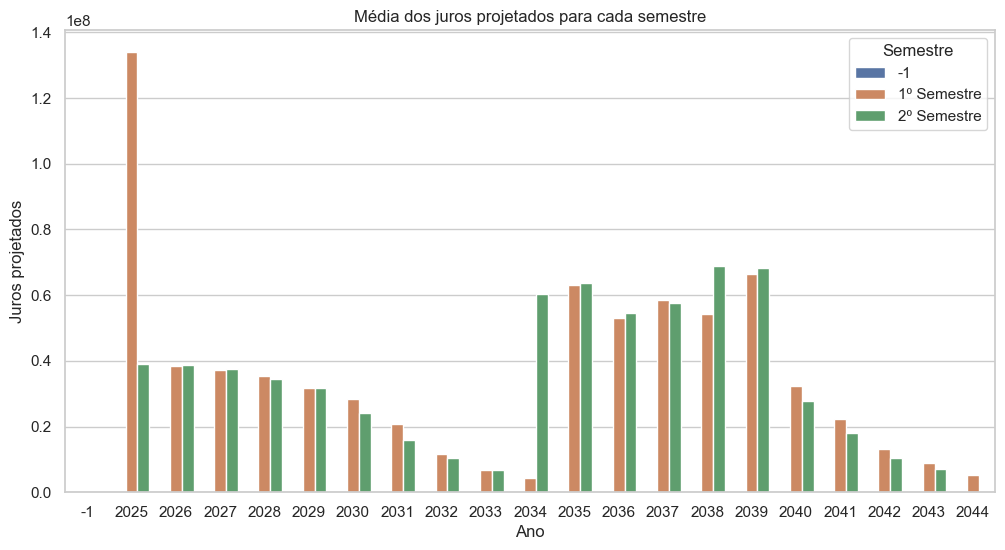

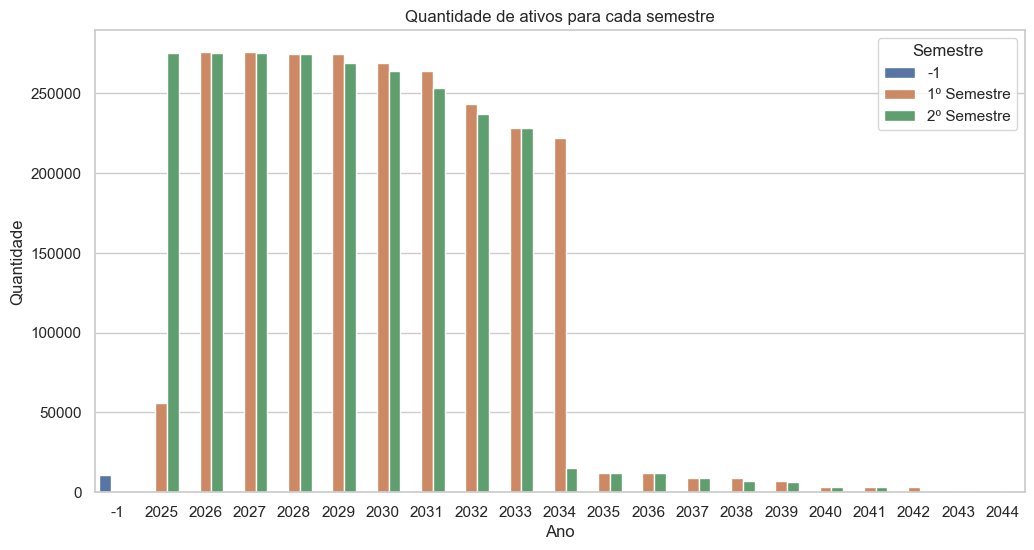

In [ ]:
#Testar se a média dos juros projetados está correta
df_juros_agrupado['Juros projetados'].mean()

#Criar um gráfico com a média dos juros projetados para cada semestre
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Juros projetados', hue='Semestre', data=df_juros_agrupado)
plt.title('Média dos juros projetados para cada semestre')
plt.show()

#Criar um gráfico com a quantidade de ativos para cada semestre
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Quantidade', hue='Semestre', data=df_juros_agrupado)
plt.title('Quantidade de ativos para cada semestre')
plt.show()